<a href="https://colab.research.google.com/github/Covpet/Covpet/blob/main/ProblemSet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Neural Networks

## Tutorial 3: Unsupervised learning

Welcome to the third tutorial for Machine Learning and Neural Netowkrs. In this session, we will explore how to apply some simple unsupervised learning algorithms. The first part of the tutorial explores Clustering, and the second Association Rules.

### Clustering

Throughout this section we will use routines implemented in scikit-learn.

#### Problem 1: K-Means clustering

Scikit-learn includes a number of datasets that you can use to test your models on. For this problem, we will use the [UCI Wine recognition](https://scikit-learn.org/1.5/datasets/toy_dataset.html#wine-recognition-dataset) dataset. Using that dataset, perform K-means clustering on the data and see if the clusters correspond to the production by each of the 3 producers (vinters).

This problem consists of a number of steps:
1. Load the dataset
2. Apply K-means to the data
  - First ask yourself: what is a reasonable number of clusters to try?
3. Visualise the results
  - Plot the pairs of features coloured by clusters
  - And plot the true labels to compare with the clusters
4. Evaluate the model by calculating the interia, and by plotting the confusion matrix between the clusters and the true labels

##### Follow-up questions:

How well does K-means perform in separating the different Vinters?

What are the limitations of using K-means for this dataset?

In [3]:
# Put your solution here:

import sklearn
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

#Load and EXamine the dataset
df= load_wine(as_frame= True)
print(df.DESCR)



.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

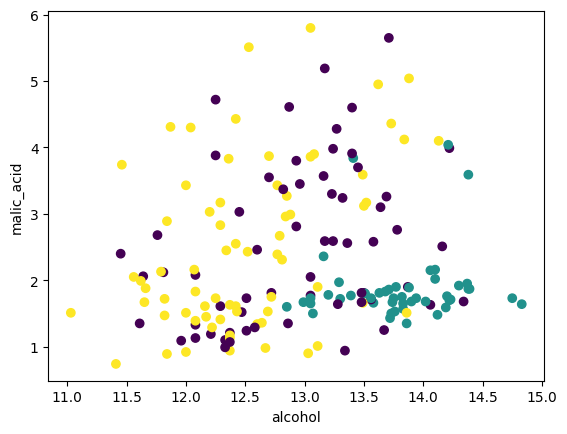

In [30]:
#Examine the dataset
X=df.data
y=df.target
#Set up clustering
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

#Plot the clustering
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=kmeans.labels_)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

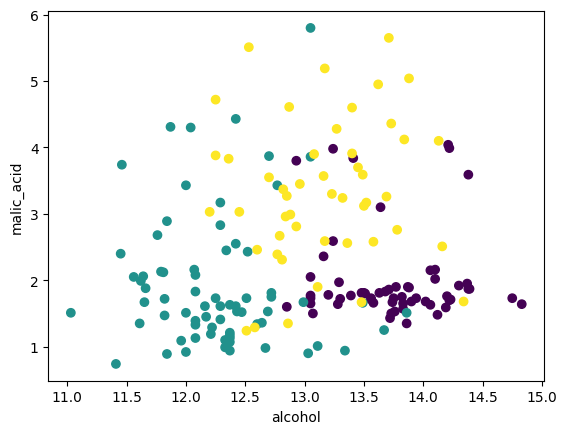

In [31]:
#Plot the true labels
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

In [32]:
#Calculate the inertia
print(f"Inertia: {kmeans.inertia_}")

Inertia: 2370689.6867829696


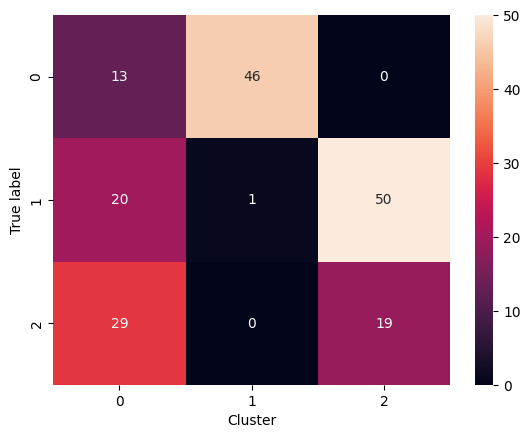

In [33]:
import seaborn as sns
cm= confusion_matrix(y,kmeans.labels_)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Cluster")
plt.ylabel("True label")
plt.show()

#### Problem 2: Finding the optimal number of clusters

The previous question used a fixed number of clusters. Now you should try to find the optimal number of clusters using the elbow method.

1. Elbow Method:
  - Implement a loop that fits K-means for a range of cluster numbers (K = 1 to 10).
  - For each value of K, compute and store the inertia (sum of squared distances from points to their assigned cluster center).
2. Plot the Elbow Curve:
  - Plot the inertia as a function of K.


Follow-up questions:

Based on the Elbow plot, what is the optimal number of clusters?

Does the optimal K match the known number of species in the Iris dataset? Why or why not?

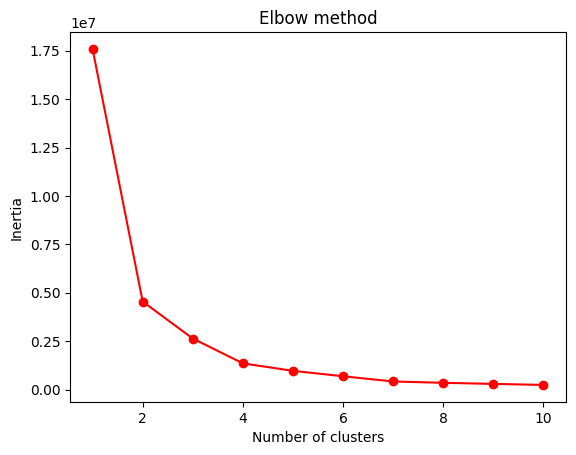

In [36]:
# enter your solution here
inertia= []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state= 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia, marker= 'o',c='red')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

#### Problem 3: Clustering high-dimensional data

For this problem, we will use the [UCI Hand-written digits](https://scikit-learn.org/1.5/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset) dataset. This dataset now has 8x8 pixels in each sample, so the dimensionality is much higher and you might not be able to easily visualise whether it is working. Using that dataset, perform K-means clustering on the data and see if the clusters correspond to the digits.

This problem consists of a number of steps:
1. Load the dataset
2. Apply K-means to the data
  - First ask yourself: what is a reasonable number of clusters to try?
3. Evaluate the results
  - Plot the confusion matrix and inertia of the results
4. Apply one of [Dimensionality reduction](https://scikit-learn.org/1.5/modules/unsupervised_reduction.html) approaches in scikit-learn to the data and then try to cluster it again. Produce the same outputs and see if they improve as you change the amount you reduce the dimensionality of the data

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

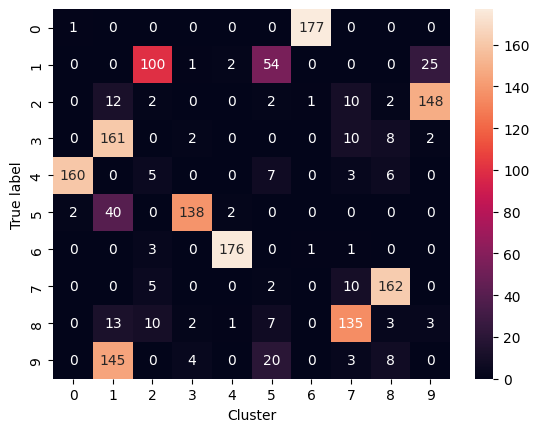

In [44]:
# emter your solution here:
from sklearn.datasets import load_digits

digits= load_digits(as_frame= True)
print(digits.DESCR)
X= digits.data
y= digits.target

X.head()

k_means= KMeans(n_clusters=10)
k_means.fit(X)
print(f"Inertia: {k_means.inertia_}")
cm= confusion_matrix(y,k_means.labels_)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Cluster")
plt.ylabel("True label")
plt.show()



Inertia: 57912.39709040073


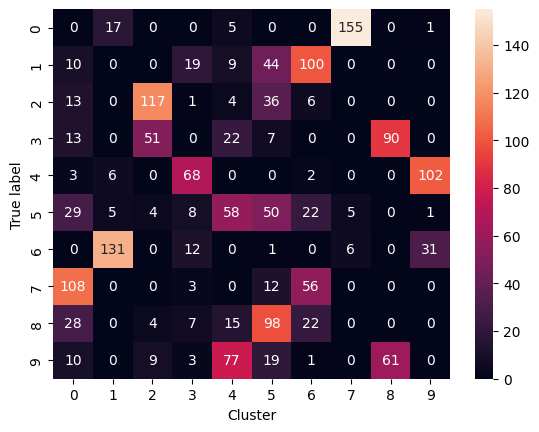

In [49]:
#Perform Dimensionality Reduction
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_pca= pca.fit_transform(X)
k_means= KMeans(n_clusters=10)
k_means.fit(X_pca)
print(f"Inertia: {k_means.inertia_}")
cm= confusion_matrix(y,k_means.labels_)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Cluster")
plt.ylabel("True label")
plt.show()

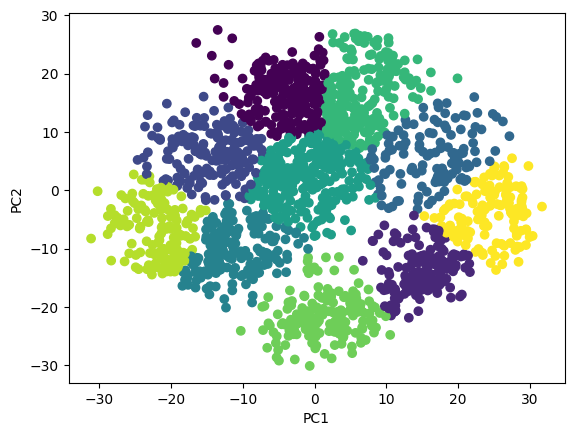

In [50]:
#Perform clustering again based on the dimensionality Reduction
plt.scatter(X_pca[:,0],X_pca[:,1],c=k_means.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### Problem 4: Gaussian Mixture Models

Now we will come back to the wine dataset. Reload that data and apply a Gaussian Mixture Model instead of k-means. Use the optimal number of clusters that you found above for the number of mixtures.

1. Apply GMM:
  - Use GaussianMixture from scikit-learn to apply GMM to the Wine dataset.
2. Cluster Visualization:
  - Visualize the clusters formed by GMM using the same two features as in Question 1.
  - Compare the clustering result with the true class labels and with the K-means result.
3. Probability Assignment:
  - Instead of hard assignments (as in K-means), GMM provides the probability that each point belongs to a cluster. Extract these probabilities for one of the clusters and plot them for all points.


Follow-up questions:

How do the GMM clusters compare to the K-means clusters?

Which model seems to perform better for this dataset?

What is the significance of the soft assignment in GMM, and in what cases is GMM preferred over K-means?

In [ ]:
# enter your solution here:


### Association Rules

#### Problem 5: Association Rule Mining

Now we will switch tack, both in topic and in the package we are using. You will construct association rules on the [Market Basket Optimisation](https://www.kaggle.com/datasets/devchauhan1/market-basket-optimisationcsv) dataset from kaggle. Since scikit-learn doesn't provide many association rule methods, you will use the mlxtend package for this.

1. Load the dataset
2. Use the apriori function from the mlxtend.frequent_patterns module to generate frequent itemsets with a minimum support of 0.15
3. Use the association_rules function to generate rules based on the frequent itemsets, using confidence as the metric with a threshold of 0.6.
4. Analysis:
  - Print the top 5 association rules sorted by lift.
  - Interpret the results: What do the top rules suggest about item co-occurrences?

Follow-up questions:

What does a high confidence score in an association rule mean?

How does the lift metric help in identifying more useful rules?

What are some potential applications of association rule mining in a retail setting?

In [ ]:
# enter your solution here:
